<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [1]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme
afficher = true
#
tester_cauchy(cauchy, afficher); # tester l'algorithme

Affichage des résultats des algorithmes : true

Test Summary:               | Pass  Total  Time
algorithme du Pas de Cauchy |    4      4  0.3s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [2]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [1.000003643199092, 0.9999997146801121, 0.9999957861612833]
  * f(x_sol) = 3.233185493810428e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9993529197795769, 0.9987042941099483]
  * f(x_sol) = 4.1909860490578263e-7
  * nb_iters = 5000
  * flag     = 3
  * solution = [1, 1]
---------------------

## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

### 1.

$f_1$ est déjà quadratique, ainsi, le modèle de Taylor à l'ordre 2 de $f_1$ est exact.

$ m_k (s) = f_1 (x_k+s) $

L'algorithme des régions de confiance approxime $f_1$ par elle-même, ainsi, il minimise directement $f_1$.

La fonction est strictement convexe donc l'algorithme de Newton converge en une itération

### 2.
#### Etude de $\Delta_{max}$

faux pour delta_max=0
faux pour delta_max=1
faux pour delta_max=2
faux pour delta_max=3


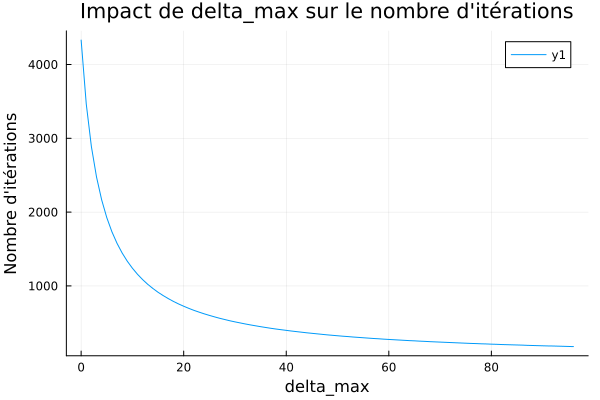

In [3]:
# Expérimentations numériques à faire ici
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots
include("../src/newton.jl") # votre algorithme de Newton
include("../src/regions_de_confiance.jl") # votre algorithme de RC

using Plots
y = []
x0 = [10000;10000;10000]
for delta_max = 0:100
    x_sol, f_sol, flag, nb_iters = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas="cauchy", Δmax=delta_max)
    if broadcast(abs,x_sol-sol_exacte_fct1) > [0.0001, 0.0001,0.00001]
        println("faux pour delta_max=", delta_max)
    else
        y = vcat(y, [nb_iters]) 
    end
    
    
end 

plot(0:(length(y)-1), y, xlabel="delta_max", ylabel="Nombre d'itérations", title="Impact de delta_max sur le nombre d'itérations")

On observe que $\Delta_{max}$ joue un rôle important dans la vitesse de convergence

#### Etude de $\rho$

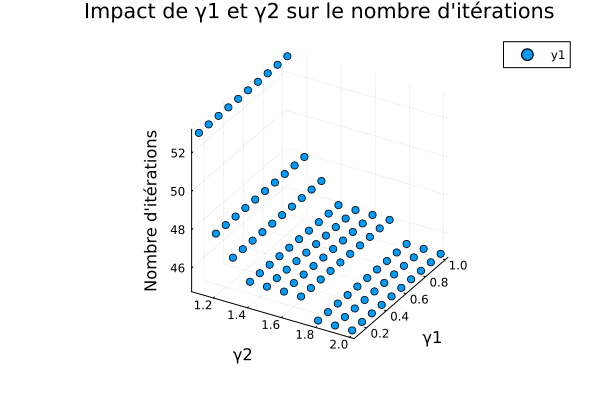

In [70]:
# Expérimentations numériques avec les facteurs d'expansion et de réduction du rayon
include("../src/newton.jl") # Votre algorithme de Newton
include("../src/regions_de_confiance.jl") # Votre algorithme des régions de confiance

using Plots

# Paramètres initiaux
x0 = [250; 250; 250] 
gamma_max_values = 1.1:0.1:2.0 
gamma_min_values = 0.1:0.1:1.0 

function test_avec_facteurs(gamma_max, gamma_min)
    x_sol, f_sol, flag, nb_iters = regions_de_confiance(
        fct1, grad_fct1, hess_fct1, 
        x0, algo_pas="cauchy", 
        γ2=gamma_max, γ1=gamma_min
    )
    return nb_iters
end

x = []
y = []
z = []
for gamma_max in gamma_max_values
    for gamma_min in gamma_min_values
        nb_iters = test_avec_facteurs(gamma_max, gamma_min)
        push!(z, nb_iters) 
        push!(y, gamma_min)
        push!(x, gamma_max)
    end
end


scatter(x,y,z, xlabel="γ2", ylabel="γ1", zlabel="Nombre d'itérations", title="Impact de γ1 et γ2 sur le nombre d'itérations")


$\gamma_{max}$ a un impact significatif. Augmenter ce facteur accélère la convergence en permettant des déplacements plus larges dans l'espace de recherche, ce qui réduit le nombre d'itérations.

$\gamma_{min}$ a un impact est plus modeste sur cet exemple. 

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [5]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [6]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary: | Pass  Total  Time
RC et gct     |   15     15  0.8s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

Cauchy: 9.103216191657122e-6
GCT: 1.2755491433176288e-15
GCT 1 itération: 1.2755491433176288e-15


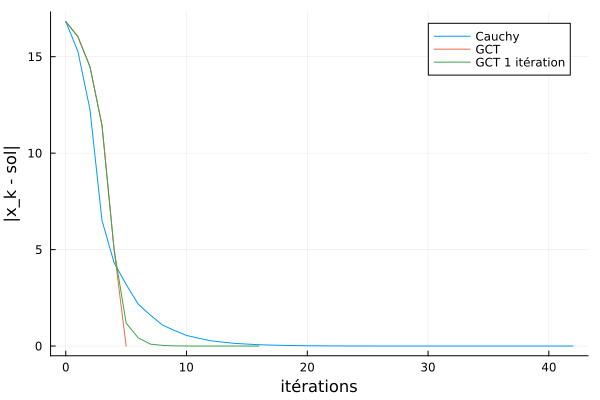

In [29]:
x0 = [-10, 10, 10]

x_sol_cauchy, f_sol, flag, nb_iters, xs_cauchy = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas="cauchy")
xs_cauchy = broadcast(norm,xs_cauchy .- [x_sol_cauchy])
println("Cauchy: ",norm(x_sol_cauchy-sol_exacte_fct1))
plot(0:nb_iters, xs_cauchy, xlabel="itérations", ylabel="|x_k - sol|", label="Cauchy")

x_sol_gct, f_sol, flag, nb_iters, xs_gct = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas="gct", Δ0=1)
xs_gct = broadcast(norm,xs_gct .- [x_sol_gct])
println("GCT: ", norm(x_sol_gct-sol_exacte_fct1))
plot!(0:nb_iters, xs_gct, label="GCT")


x_sol_gct_1, f_sol, flag, nb_iters, xs_gct_1 = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas="gct", max_iter_gct=1, Δ0=1)
xs_gct_1 = broadcast(norm,xs_gct_1 .- [x_sol_gct_1])
println("GCT 1 itération: ", norm(x_sol_gct-sol_exacte_fct1))
plot!(0:nb_iters, xs_gct_1, label="GCT 1 itération")

Cauchy: 0.0017587958773258893
GCT: 1.092197572707946e-7
GCT 1 itération: 1.092197572707946e-7


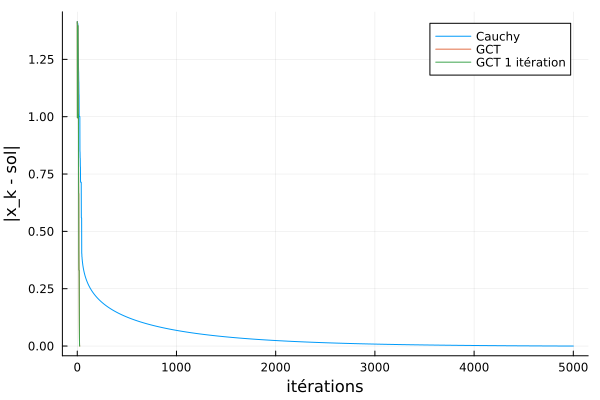

In [27]:
x0 = [0,2]

x_sol_cauchy, f_sol, flag, nb_iters, xs_cauchy = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas="cauchy")
xs_cauchy = broadcast(norm,xs_cauchy .- [x_sol_cauchy])
println("Cauchy: ",norm(x_sol_cauchy-sol_exacte_fct2))
plot(0:nb_iters, xs_cauchy, xlabel="itérations", ylabel="|x_k - sol|", label="Cauchy")

x_sol_gct, f_sol, flag, nb_iters, xs_gct = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas="gct", Δ0=1)
xs_gct = broadcast(norm,xs_gct .- [x_sol_gct])
println("GCT: ", norm(x_sol_gct-sol_exacte_fct2))
plot!(0:nb_iters, xs_gct, label="GCT")


x_sol_gct_1, f_sol, flag, nb_iters, xs_gct_1 = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas="gct", max_iter_gct=1, Δ0=1)
xs_gct_1 = broadcast(norm,xs_gct_1 .- [x_sol_gct_1])
println("GCT 1 itération: ", norm(x_sol_gct-sol_exacte_fct2))
plot!(0:nb_iters, xs_gct_1, label="GCT 1 itération")




On constate que le GCT converge beaucoup plus rapidement que la méthode de Cauchy.


Dans le premier cas, limiter le GCT à une itération rend la convergence de l'algorithme des régions de confiance plus lente que le GCT non borné en itérations.

Limiter le GCT à une itération peut réduire la précision de la solution.